### Цель работы:
Изучение алгоритмов и методов регрессии на практике.
### **Вариант 2**


### Импорт основных библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_var2 = pd.read_excel('regression.xlsx', sheet_name=1)

### **Часть 1 - Простая линейная регрессия**

Обучить модель простой (парной) линейной регрессии, используя для обучения значения ```x1``` и ```y```, а затем ```x2``` и ```y```.

**1.1 В данном фрагменте кода последовательно строятся две модели простой линейной регрессии.**

Для обучения моделей были выполнены следующие шаги:
1) Из исходного набора данных были выделены независимые переменные ```x1``` и ```x2``` (признаки), а также зависимая переменная ```y``` (цель моделирования).
2) Для каждого признака (```x1``` и ```x2```) была создана отдельная модель линейной регрессии ```LinearRegression()```.
3) Каждая модель была обучена на своих данных с использованием метода ```.fit()```, что позволило определить коэффициенты и получить уравнение линейной зависимости между соответствующим признаком и целевой переменной ```y```.

LinearRegression()

**1.2 Далее была использована обученная модель, чтобы получить предсказания целевой переменной (необходимо для оценки точности моделей).**

```model_x1.predict(x1)``` - модель, обученная на признаке ```x1```, вычисляет прогнозируемые значения ```y``` для тех же входных данных ```x1```. Результат сохраняется в переменной ```y_pred_x1```.

```model_x2.predict(x2)``` - аналогично, вторая модель, обученная на признаке ```x2```, генерирует предсказанные значения ```y``` на основе входных значений ```x2```. Результат сохраняется в переменной ```y_pred_x2```.

In [5]:
# Предсказания для модели по x1
y_pred_x1_train = model_x1.predict(X1_train)
y_pred_x1_val = model_x1.predict(X1_val)
y_pred_x1_test = model_x1.predict(X1_test)

# Предсказания для модели по x2
y_pred_x2_train = model_x2.predict(X2_train)
y_pred_x2_val = model_x2.predict(X2_val)
y_pred_x2_test = model_x2.predict(X2_test)

**1.3 Была сформирована таблица с результатами предсказаний моделей.**

Где:
- ```Actual``` - фактические значения целевой переменной ```y```;
- ```Predicted_x1``` - значения, предсказанные первой моделью (построенной по признаку ```x1```);
- ```Predicted_x2``` — значения, предсказанные второй моделью (по признаку ```x2```).

In [7]:
df_results = pd.DataFrame({
    'Actual_val': y_val,
    'Pred_x1_val': y_pred_x1_val,
    'Pred_x2_val': y_pred_x2_val
})

display(df_results.head())

,Actual_val,Pred_x1_val,Pred_x2_val
726,0.348886,0.220848,1.386869
138,-0.138932,-0.702570,-0.857831
266,1.326689,0.874652,1.674577
765,0.074433,1.476316,-0.501008
798,0.206321,-0.324458,-0.197748


Анализ результатов на валидационной выборке показывает, что обе построенные модели линейной регрессии (по признакам x1 и x2) демонстрируют значительные отклонения от истинных значений: ошибки находятся в диапазоне от 0.12 до 1.4 для модели по x1 и от 0.35 до 1.04 для модели по x2. В отдельных случаях прогнозы заметно переоценивают или недооценивают целевую переменную, что указывает на слабую линейную зависимость между исходными признаками и y. Модель по признаку x2 в целом работает чуть стабильнее, однако и она, и модель по x1 показывают недостаточно высокое качество, что говорит о необходимости рассмотрения более сложных моделей или добавления нелинейных признаков для улучшения точности.

**1.4 Были подсчитаны и выведены в консоль метрики качества регрессии (MSE, MAE, RMSE, R2) для каждой модели.**

In [12]:
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\nМетрики {name}:")
    print("MSE:", round(mse, 5))
    print("MAE:", round(mae, 5))
    print("RMSE:", round(rmse, 5))
    print("R2:", round(r2, 5))

# Модель по x1
print_metrics("x1 (train)", y_train, y_pred_x1_train)
print_metrics("x1 (validation)", y_val, y_pred_x1_val)
print_metrics("x1 (test)", y_test, y_pred_x1_test)

# Модель по x2
print_metrics("x2 (train)", y_train, y_pred_x2_train)
print_metrics("x2 (validation)", y_val, y_pred_x2_val)
print_metrics("x2 (test)", y_test, y_pred_x2_test)



Метрики x1 (train):
MSE: 1.96858
MAE: 1.17656
RMSE: 1.40306
R2: 0.45801

Метрики x1 (validation):
MSE: 1.85765
MAE: 1.13725
RMSE: 1.36296
R2: 0.37008

Метрики x1 (test):
MSE: 1.74574
MAE: 1.09442
RMSE: 1.32127
R2: 0.35617

Метрики x2 (train):
MSE: 2.21877
MAE: 1.14332
RMSE: 1.48955
R2: 0.38913

Метрики x2 (validation):
MSE: 2.00568
MAE: 1.07088
RMSE: 1.41622
R2: 0.31988

Метрики x2 (test):
MSE: 1.82594
MAE: 1.01297
RMSE: 1.35127
R2: 0.3266


**MSE (Mean Squared Error)** - среднеквадратичная ошибка - показывает, насколько в среднем модель ошибается. Чем меньше MSE - тем лучше модель.\
**MAE (Mean Absolute Error)** - средняя абсолютная ошибка - это «средняя ошибка» в тех же единицах, что и целевая переменная. Чем меньше, тем лучше.\
**RMSE (Root Mean Squared Error)** - корень из MSE - тоже показывает ошибку, но учитывает сильные отклонения. Показатель в том же масштабе, что и целевая переменная (как MAE). Чем меньше - тем лучше.\
**R2 (коэффициент детерминации)** - показывает, насколько хорошо модель объясняет данные. 1 = идеальная модель, 0 = модель никак не помогает. Чем ближе к 1 - тем лучше.

Результаты:\
Анализ метрик показывает, что обе линейные модели - как по признаку x1, так и по признаку x2 - демонстрируют умеренное качество предсказания, при котором доля объяснённой дисперсии остаётся ниже 0.46 на тренировочной выборке и снижается до примерно 0.32-0.36 на валидационной и тестовой выборках. Ошибки MSE, MAE и RMSE остаются достаточно высокими и мало изменяются между выборками, что свидетельствует о стабильной, но недостаточной точности моделей и отсутствии переобучения. Модель по x1 показывает немного лучшие значения R^2 на всех этапах (особенно на обучении - 0.458), однако модель по x2 имеет несколько меньшие абсолютные ошибки MAE на валидации и тесте. В целом результаты указывают на то, что линейная зависимость между отдельными признаками и целевой переменной выражена слабо, и для улучшения качества предсказания требуется использование более сложных моделей или добавление нелинейных преобразований признаков.

**1.5 Вывод значений коэффициентов a и b.**

In [13]:
print("Коэффициенты модели по x1:")
print("a =", model_x1.coef_[0])
print("b =", model_x1.intercept_)

print("\nКоэффициенты модели по x2:")
print("a =", model_x2.coef_[0])
print("b =", model_x2.intercept_)

Коэффициенты модели по x1:
a = 1.0986720240680257
b = -0.02075541123025918

Коэффициенты модели по x2:
a = -1.0146247828660253
b = 0.020855669822819695


Коэффициенты линейных моделей показывают, что влияние каждого признака на целевую переменную имеет противоположный характер: для модели по x1 коэффициент наклона положительный (a = 1.0987), что означает прямую зависимость - при увеличении x1 значение y также возрастает. Напротив, коэффициент модели по x2 отрицательный (a = -1.0146), что указывает на обратную зависимость между x2 и y. Значения свободных членов (b = -0.021 для x1 и b = 0.021 для x2) близки к нулю, что говорит о том, что модели практически не смещены по оси y. В целом коэффициенты подтверждают наличие слабых, но противоположно направленных линейных тенденций для двух признаков, что согласуется с ранее полученными метриками, показывающими ограниченную предсказательную способность каждой из моделей.

**1.6 Далее была сделана визуализация регрессии: точки (scatter plot) и линия регрессии.**

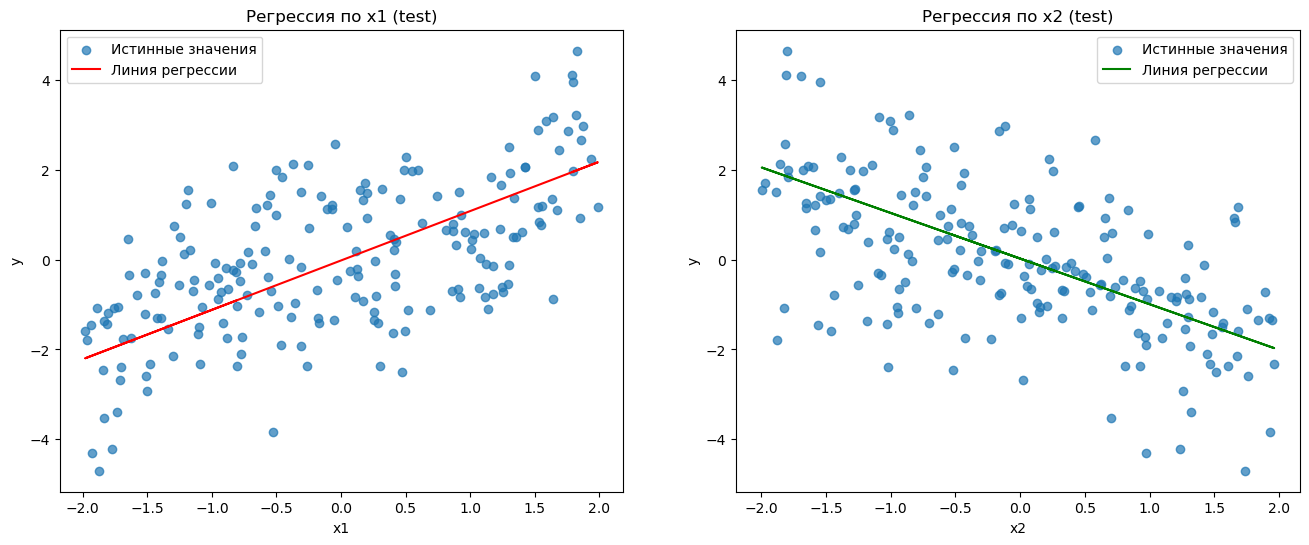

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# x1
ax1.scatter(X1_test, y_test, label='Истинные значения', alpha=0.7)
ax1.plot(X1_test, y_pred_x1_test, color='red', label='Линия регрессии')
ax1.set_title('Регрессия по x1 (test)')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.legend()

# x2
ax2.scatter(X2_test, y_test, label='Истинные значения', alpha=0.7)
ax2.plot(X2_test, y_pred_x2_test, color='green', label='Линия регрессии')
ax2.set_title('Регрессия по x2 (test)')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()

**Выводы:**

Графики регрессии на тестовой выборке подтверждают выводы, сделанные на основе метрик: обе модели улавливают лишь общие тенденции, но не обеспечивают высокой точности предсказания. Для признака x1 наблюдается слабая положительная линейная зависимость - линия регрессии наклонена вверх, однако фактические точки сильно рассредоточены вокруг неё, что указывает на значительный уровень шума и низкую плотность данных вдоль прямой. Для признака x2 картина аналогична, но наклон линии отрицательный, отражая обратную зависимость, однако рассеяние точек также большое, а значительная часть наблюдений располагается далеко от линии регрессии. В целом оба графика демонстрируют, что линейная модель описывает структуру данных лишь частично, а качественного совпадения с фактическими значениями не достигается; следовательно, для более точного моделирования вероятно требуется использование нелинейных методов или более информативных признаков.


**1.7 Построение графика с разницей предсказанного и истинного значения по каждой точке.**

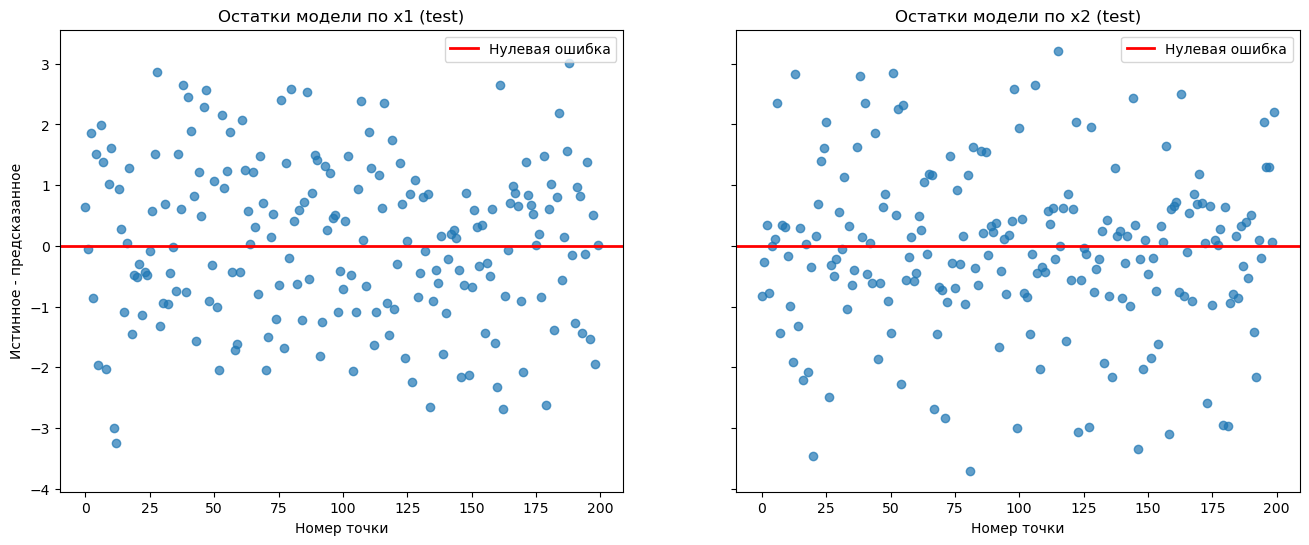

In [16]:
# Остатки на тестовой выборке
residuals_x1 = y_test - y_pred_x1_test
residuals_x2 = y_test - y_pred_x2_test

# Создание фигуры
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Остатки для модели по x1
ax1.scatter(range(len(y_test)), residuals_x1, alpha=0.7)
ax1.axhline(y=0, color='red', linewidth=2, label='Нулевая ошибка')
ax1.set_title('Остатки модели по x1 (test)')
ax1.set_xlabel('Номер точки')
ax1.set_ylabel('Истинное - предсказанное')
ax1.legend()

# Остатки для модели по x2
ax2.scatter(range(len(y_test)), residuals_x2, alpha=0.7)
ax2.axhline(y=0, color='red', linewidth=2, label='Нулевая ошибка')
ax2.set_title('Остатки модели по x2 (test)')
ax2.set_xlabel('Номер точки')
ax2.legend()

plt.show()


**Выводы:**

Остаточные графики для моделей по признакам x1 и x2 показывают, что ошибки распределены хаотично вокруг нулевой линии, без очевидных трендов или структурных зависимостей, что формально соответствует требованиям линейной регрессии. Однако значительная вертикальная разреженность точек и широкая амплитуда колебаний остатков указывают на высокий уровень шума и ограниченную способность моделей объяснять вариацию целевой переменной. В обоих случаях остатки демонстрируют почти равномерное рассеяние по всей выборке, что подтверждает отсутствие систематической пере- или недооценки, но также подчёркивает недостаточную модельную гибкость: линейная аппроксимация не улавливает скрытых закономерностей в данных. Таким образом, даже при отсутствии явных нарушений предпосылок линейной модели, высокая дисперсия и разброс остатков подтверждают вывод о слабой предсказательной силе обеих моделей и необходимости использования более сложных методов или дополнительных признаков.


**1.8 Выводы по первой части.**

Все метрики ошибок (MSE, MAE, RMSE) на тестовой выборке у модели по признаку x2 ниже, чем у модели по x1, что говорит о том, что модель по x2 допускает меньшие ошибки и её предсказания ближе к реальным значениям.

Коэффициент детерминации R2 для модели по x1 на тесте равен 0.35617 - это относительно низкое значение, показывающее, что модель объясняет лишь часть вариации целевой переменной, а связь между x1 и y слабая. Для модели по x2 R2 на тесте равен 0.3266, что немного ниже, чем у x1, однако разница несущественная. Обе модели обладают ограниченной способностью объяснять вариацию целевой переменной.

По графикам регрессии видно, что линия модели по x1 имеет слабый положительный наклон, но точки сильно рассредоточены, что отражает высокий уровень шума и низкую плотность данных вдоль прямой. Модель по x2 демонстрирует отрицательную зависимость - линия наклонена вниз, однако рассеяние точек также велико. Это подтверждает, что обе линейные модели фиксируют лишь общие тенденции и не обеспечивают высокой точности предсказаний.

Остаточные графики показывают, что ошибки распределены хаотично вокруг нулевой линии без явных трендов, что формально соответствует предпосылкам линейной регрессии. При этом широкая амплитуда колебаний и разреженность точек подтверждают высокий уровень шума и ограниченную объяснительную способность моделей.

Таким образом, обе модели улавливают лишь базовую структуру данных, но их предсказательная сила низкая. Для более точного прогнозирования вероятно потребуется использование нелинейных методов или более информативных признаков.

### **Часть 2. Полиномиальная регрессия**

**2.1 Выбор модели для полиномиальной регрессии, реализация модели полиномиальной регрессии.**

Для полиномиальной регрессии была выбрана вторая модель (```x2 - y```). У модели 2 коэффициент R2 выше, чем у модели 1. Это означает, что ```x2``` лучше объясняет изменение ```y```. Первая модель имеет линию регрессии, практически не меняющуюся при изменении ```x1``` - то есть связь между ```x1``` и ```y``` слабая. Графики остатков и сравнение предсказанных значений показали, что модель по ```x2```даёт меньшие ошибки и предсказывает точнее.
Поэтому применение полиномиальной регрессии целесообразнее именно для признака ```x2```, так как у него уже есть линейная зависимость с ```y```, и усложнение модели полиномиальным выражением может улучшить предсказание.

Степень полинома выбрана равной 2, так как это стандартный и оптимальный вариант для проверки нелинейной зависимости.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
# Подготовка данных
x = df_var2[['x2']]
y = df_var2['y']

# Выбор степени полинома
degree = 2

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=degree)    

**2.2 - 2.4 Обучение полиномиальной регрессии, выполнение предсказания, подсчет и вывод метрик качества регресии (MAE, R2).**

In [31]:
x_poly = poly.fit_transform(x)

# Обучение модели полиномиальной регрессии
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Предсказание значений целевой переменной
y_poly_pred = poly_model.predict(x_poly)

# Подсчет метрик качества модели
mae_poly = mean_absolute_error(y, y_poly_pred)
r2_poly = r2_score(y, y_poly_pred)

# Вывод результатов с округлением до 5 знаков
print(f"Полиномиальная регрессия (степень = 2)")
print(f"MAE: {mae_poly:.5f}")
print(f"R2: {r2_poly:.5f}")

Полиномиальная регрессия (степень = 2)
MAE: 1.10073
R2: 0.36970


**Вывод:**

Построена полиномиальная регрессия второй степени для описания зависимости целевой переменной от признака x. Модель показала значение MAE = 1.10073, что указывает на среднюю абсолютную ошибку предсказания около 1.1 единицы, и коэффициент детерминации R^2 = 0.36970, что свидетельствует о низкой объяснительной способности модели: она улавливает лишь часть вариации целевой переменной. По сравнению с линейной регрессией, полиномиальная модель слегка улучшает точность предсказаний, однако рассеяние данных и невысокое значение R^2 указывают на значительный уровень шума и слабую предсказательную силу. Следовательно, для более точного моделирования, вероятно, потребуется подбор степени полинома, использование дополнительных признаков или применение более сложных нелинейных методов.

**2.5 Визуализация регрессии: точки и линия регрессии.**

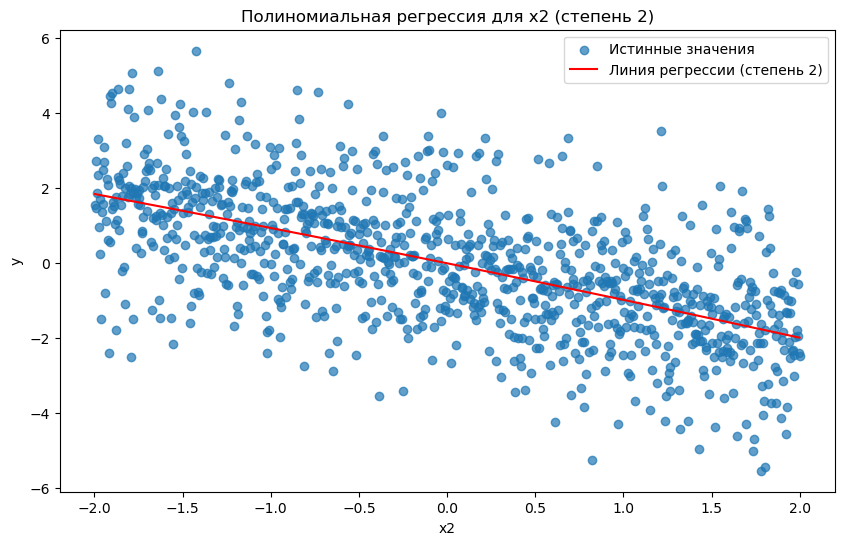

In [28]:
# Сортировка значений для корректного построения линии полиномиальной регрессии
sort_idx = np.argsort(x.values.flatten())               # Индексы сортировки по x
x_sorted = x.values.flatten()[sort_idx]                 # Сортированный x
y_poly_pred_sorted = y_poly_pred[sort_idx]              # y в таком же порядке

# Построение графика
plt.figure(figsize=(10, 6))

# Точки исходных данных
plt.scatter(x.values.flatten(), y, label='Истинные значения', alpha=0.7)

plt.plot(x_sorted, y_poly_pred_sorted, color='red', label=f'Линия регрессии (степень {degree})')

plt.title(f"Полиномиальная регрессия для x2 (степень {degree})")
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

**Выводы по графику:**

Тренд зависимости между `x2` и `y` имеет слабо выраженную нелинейную компоненту. Несмотря на то, что использована полиномиальная регрессия второй степени, изгиб красной линии очень незначителен - она в основном следует линейному убыванию. Это указывает на то, что квадратичный член в модели вносит минимальный вклад в объяснение вариации `y`, и линейная модель могла бы быть почти столь же эффективной.

Линия регрессии проходит через центр облака данных, отражая общую тенденцию снижения `y` с ростом `x2`. Это подтверждает наличие статистически значимой (хотя и слабой) обратной связи между переменными.

Однако разброс точек вокруг линии регрессии остаётся очень большим. Это означает, что модель объясняет лишь небольшую долю общей изменчивости целевой переменной `y`. Следовательно, на `y` существенно влияют другие факторы, не учтённые в данной модели, либо данные содержат высокий уровень шума. Для повышения качества прогноза необходимо рассмотреть дополнительные переменные или более сложные модели.

**2.6 Повторение пунктов 1-5 для другой степени полинома.**

Конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

In [32]:
# Перебор степеней от 1 до 6
results = []

for degree in range(1, 7):
    poly = PolynomialFeatures(degree=degree)

    # Преобразование X
    x_poly = poly.fit_transform(x)

    # Обучение модели
    model = LinearRegression()
    model.fit(x_poly, y)

    # Предсказание
    y_pred = model.predict(x_poly)

    # Метрики
    mae = round(mean_absolute_error(y, y_pred), 5)
    r2 = round(r2_score(y, y_pred), 5)

    # Сохранение результатов
    results.append([degree, mae, r2])

# Формируем таблицу
df_poly_results = pd.DataFrame(results, columns=["Степень полинома", "MAE", "R2"])
df_poly_results

,Степень полинома,MAE,R2
0,1,1.10044,0.36957
1,2,1.10073,0.36970
2,3,1.10156,0.36992
3,4,1.10188,0.36997
4,5,1.10202,0.37000
5,6,1.10231,0.37082


**Вывод:**

Анализ метрик полиномиальной регрессии при степенях от 1 до 6 показывает, что увеличение степени почти не улучшает качество модели: MAE начинает расти с 3 степени, а R^2 изменяется незначительно. Наибольший R^2 достигается при степени 6, но при этом ошибка увеличивается, что указывает на переобучение. Оптимальной остаётся модель первой степени (линейная), при желании можно использовать степень 2 для сохранения простоты и интерпретируемости без ухудшения точности.

**2.7 Выводы по второй части.**

В ходе эксперимента была построена полиномиальная регрессия второй степени для переменной x2, а также проведён перебор степеней полинома от 1 до 6 для анализа влияния степени на качество модели. Для каждой модели рассчитывались метрики качества: средняя абсолютная ошибка (MAE) и коэффициент детерминации R^2.

Для модели второй степени MAE составила 1.10073, а R^2 = 0.36970, что указывает на низкую объяснительную способность модели: она улавливает лишь часть вариации целевой переменной, а остаточный разброс данных остаётся значительным. Наклон линии регрессии практически линейный, квадратичный член вносит минимальный вклад, и модель лишь слегка корректирует линейную зависимость между x2 и y. Это подтверждает, что линейная модель уже описывает основную тенденцию, а полиномиальная регрессия второй степени даёт лишь незначительное улучшение.

Анализ метрик при степенях от 1 до 6 показал, что увеличение степени почти не улучшает качество модели: MAE начинает расти с третьей степени, а R^2 изменяется крайне мало. Наибольший R^2 достигается при степени 6, однако при этом ошибка увеличивается, что указывает на переобучение. Следовательно, оптимальной является линейная модель первой степени, которая обеспечивает наименьшую ошибку и сохраняет простоту. При необходимости допустимо использовать полином степени 2, так как он остаётся интерпретируемым и не ухудшает качество предсказаний. Более высокие степени нецелесообразны: прирост R^2 минимален, а ошибки предсказания растут, что снижает обобщающую способность модели.

### **Часть 3 Решение задачи регрессии различными методами**

**3.1 Загрузка набора данных ```salary.csv```, просмотр данных и информации о датасете через ```info()```.**

In [34]:
df_salary = pd.read_csv('salary.csv')
display(df_salary.head())
display(df_salary.info())

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


None

**3.2 Выделение целевой переменной, построение ```boxplot``` и гистограммы для целевой переменной.**

В качестве целевой переменной была выбрана ```salary```, так как цель исследования - построить модель для предсказания годовой зарплаты на основании социально-экономических факторов. Выбор другой переменной технически возможен, однако противоречит постановке задачи.

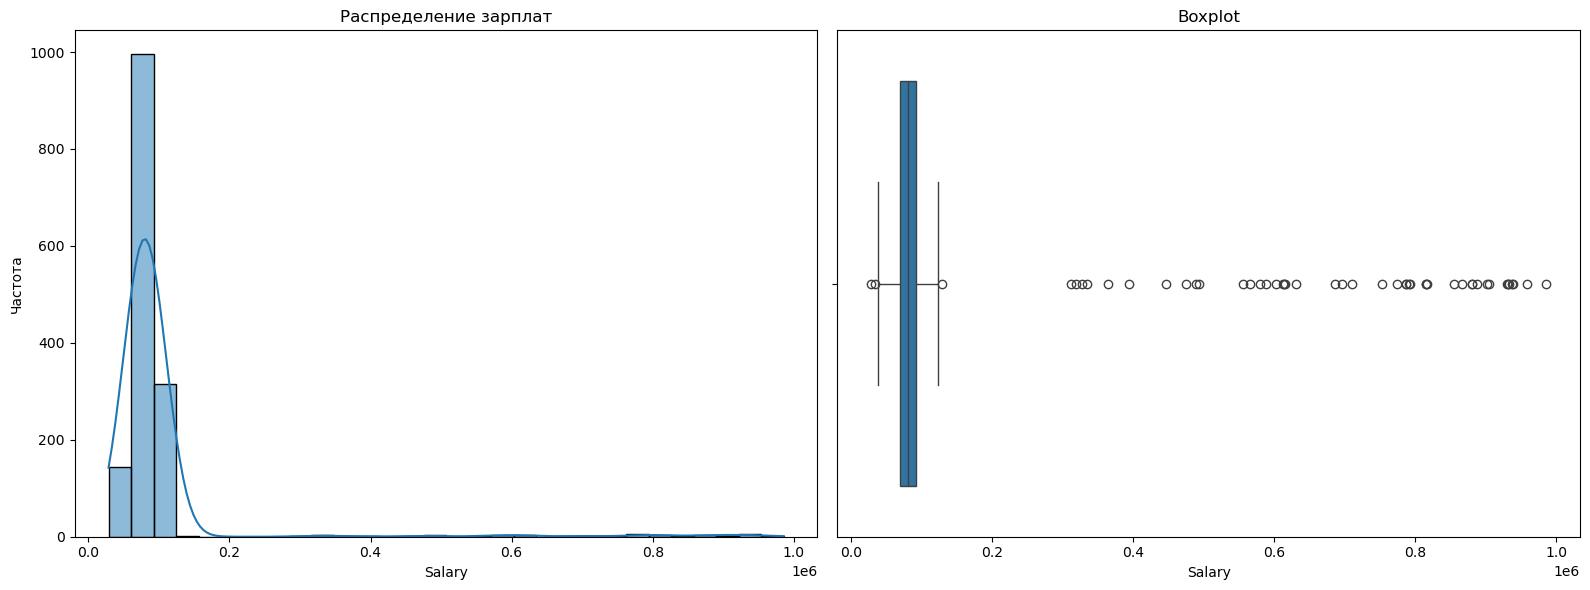

In [35]:
# Целевая переменная (y)
y = df_salary['salary']

# Визуализация целевой переменной
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Salary')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=y)
plt.title('Boxplot')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()


**Выводы по графикам:**

На графиках показано распределение годовой зарплаты сотрудников из выборки (гистограмма и ```boxplot```).

1. Распределение сильно смещено вправо. Большая часть сотрудников получает зарплату в диапазоне примерно от 50 000 до 150 000 USD. Но на графике видно длинный «хвост» справа - это означает наличие сравнительно небольшого количества людей с очень высокой зарплатой (до 1 000 000 USD).
2. ```Boxplot``` показывает множество выбросов. На правой части ```boxplot``` видно большое количество точек - это выбросы, то есть сотрудники с зарплатами, значительно превышающими основную массу данных.
3. Среднее значение зарплаты будет выше медианы. Из-за наличия высоких зарплат (выбросов) среднее «тянется» вверх.

Таким образом, перед построением модели стоит рассмотреть трансформацию данных, чтобы уменьшить влияние выбросов и улучшить качество предсказания.

**3.3 Обработка выбросов, визуализация после обработки.**

После анализа распределения зарплат методом ```boxplot``` было выявлено большое количество выбросов. Для корректной работы моделей регрессии выбросы были обработаны с использованием метода ```IQR``` (межквартильного размаха).

Нижняя граница: 36501.06
Верхняя граница: 124718.65
Размер исходного датасета: 1500
Размер после удаления выбросов: 1452


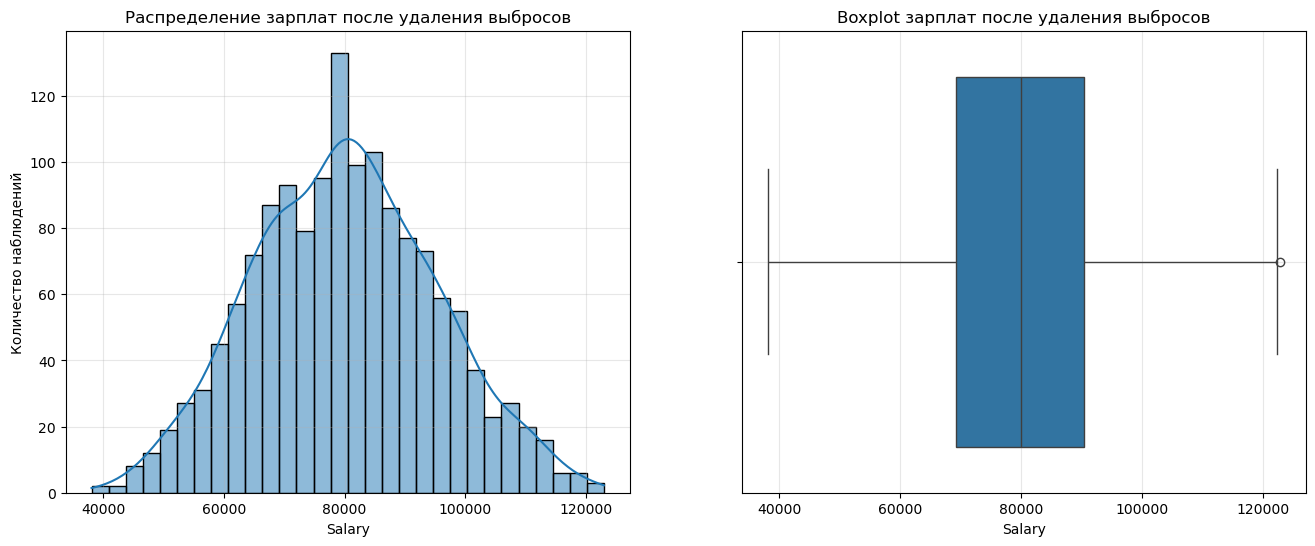

In [36]:
# Определяем границы по методу IQR
Q1 = df_salary['salary'].quantile(0.25)
Q3 = df_salary['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

# Фильтрация данных (удаляем выбросы)
df_salary_filtered = df_salary[(df_salary['salary'] >= lower_bound) & (df_salary['salary'] <= upper_bound)]

print(f"Размер исходного датасета: {df_salary.shape[0]}")
print(f"Размер после удаления выбросов: {df_salary_filtered.shape[0]}")

# Визуализация после обработки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма после удаления выбросов
sns.histplot(df_salary_filtered['salary'], bins=30, kde=True, ax=ax1)
ax1.set_title('Распределение зарплат после удаления выбросов')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Количество наблюдений')
ax1.grid(alpha=0.3)

# Boxplot после удаления выбросов
sns.boxplot(x=df_salary_filtered['salary'], ax=ax2)
ax2.set_title('Boxplot зарплат после удаления выбросов')
ax2.set_xlabel('Salary')
ax2.grid(alpha=0.3)

plt.show()

**Выводы:**

После применения метода ```IQR``` для удаления выбросов распределение целевой переменной ```salary``` значительно изменилось.

1. Гистограмма после удаления выбросов:
- Распределение стало более симметричным и похоже на нормальное.
- Исчез "длинный хвост" вправо, который наблюдался до очистки данных.
- Основная масса значений теперь находится в диапазоне примерно от 36 000 до 125 000.
2. ```Boxplot``` после удаления выбросов:
- На графике видно, что выбросы практически отсутствуют.
- Диапазон значений стал компактнее, что говорит о более стабильной выборке.
3. Статистика по размеру выборки:
- Было удалено 48 строк из 1500.
- Значит, выбросов было немного, но они могли искажать результаты моделей.

В ходе анализа целевой переменной были выявлены выбросы, которые искажали распределение и могли негативно сказаться на качестве модели регрессии. Для их поиска использовался метод межквартильного размаха. После удаления выбросов распределение зарплат стало более симметричным и ближе к нормальному. ```Boxplot``` подтверждает отсутствие экстремальных значений. Это улучшает качество данных и делает модель более устойчивой.

**3.4 Построение матрицы диаграммы рассеяния.**

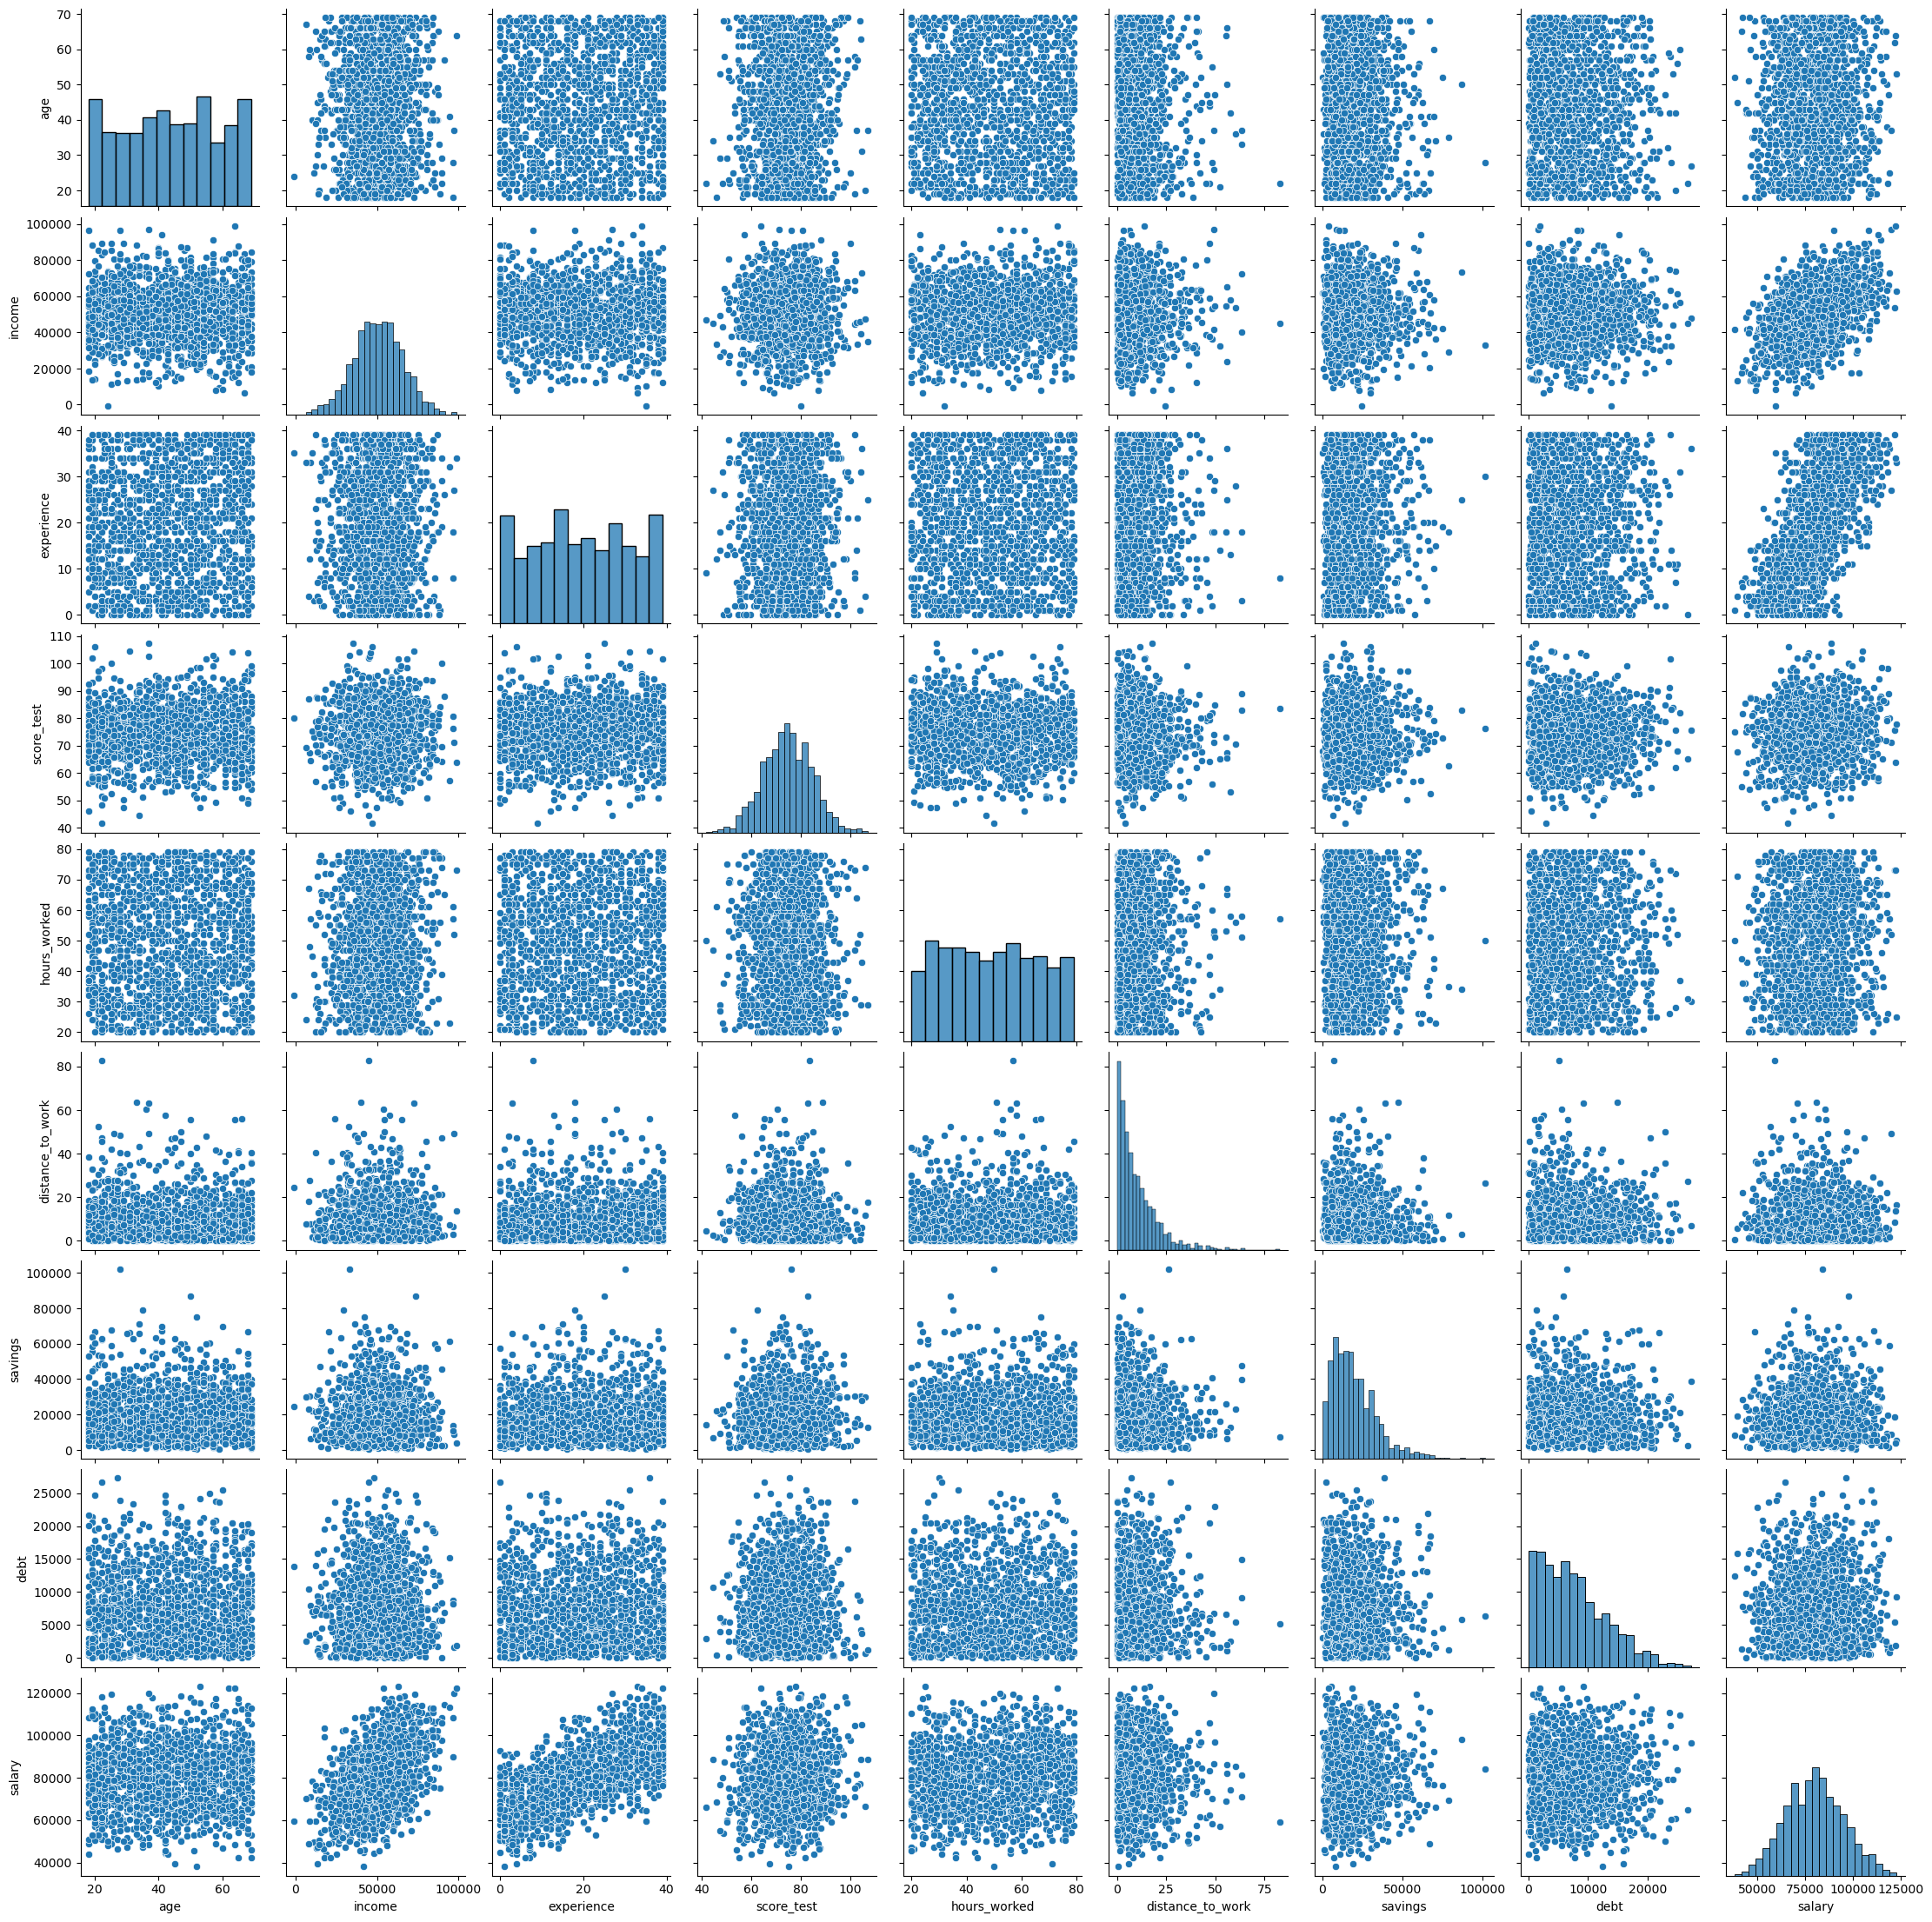

In [37]:
numerical_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']

sns.pairplot(df_salary_filtered[numerical_features])
plt.show()

**3.5 Разделение данных на обучающую и валидационные выборки.**

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Обновляем X и y после очистки
y = df_salary_filtered['salary']
X = df_salary_filtered.drop('salary', axis=1)

# Определяем числовые и категориальные признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
categorical_features = ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']

# Создаём препроцессор: числовые — стандартизируем, категориальные — кодируем
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)
# Разделение данных: 80% на обучение, 20% на тест
# random_state=42 - для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test):   {X_test.shape}")
print(f"Размер обучающей выборки (y_train): {y_train.shape}")
print(f"Размер тестовой выборки (y_test):   {y_test.shape}")

Размер обучающей выборки (X_train): (1161, 14)
Размер тестовой выборки (X_test):   (291, 14)
Размер обучающей выборки (y_train): (1161,)
Размер тестовой выборки (y_test):   (291,)


1. В обучающей выборке 1161 строка и 14 признаков (столбцов). Модель будет учиться на этих данных.
2. В тестовой выборке 291 строка и тоже 14 признаков. Эти данные модель не видела при обучении - они нужны для проверки качества модели.
3. В ```y_train``` - 1161 значение зарплаты (целевой переменной), соответствующее обучающим данным.
4. В ```y_test``` - 291 значение зарплаты для тестовой выборки. На них мы сравним предсказания модели с реальностью.

**3.6 Нормализация данных.**

In [39]:
from sklearn.preprocessing import StandardScaler

# Отделяем числовые признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
categorical_features = df_salary.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True) 
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)
scaler = StandardScaler()
# Применение нормализации к числовым столбцам X_train
# fit_transform() вычисляет среднее значение (mean) и стандартное отклонение (std) а затем масштабирует их.
X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])
# Применение нормализации к числовым столбцам X_test
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

# Замена числовых столбцов нормализованными значениями
X_train_processed = X_train_encoded
X_test_processed = X_test_encoded

**3.7 Обучение модели через LinearRegression.**

In [40]:
# Создание и обучение модели на обработанных данных
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)


LinearRegression()

**3.8 Применение обученной модели на тестовой выборке и оценка качества с помощью метрик.**

In [41]:
# Делаем предсказания
y_pred = model_lr.predict(X_test_processed)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Метрики")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2: {r2:.5f}")


Метрики
MSE: 36935814.39414
RMSE: 6077.48422
MAE: 4864.28009
R2: 0.86634


**Выводы:**

1. MAE = 4864 долларов. В среднем модель ошибается примерно на 4.8 тыс. долларов в предсказании зарплаты. Для задач предсказания зарплаты - это довольно хорошая точность, учитывая, что зарплаты находятся в диапазоне 30-120 тыс. долларов.
2. RMSE = 6077 долларов. Сильных выбросов немного, модель в целом стабильна.
3. MSE = 36.9 млн. Значение выглядит большим, но MSE работает в квадрате величины ошибки, поэтому для зарплат в десятки тысяч это нормально и ожидаемо. Используется не для интерпретации, а для сравнения моделей между собой.
4. R2 = 0.86634 (86.6%). Высокий показатель - модель объясняет 86.6% всей вариации зарплаты на тестовых данных.

Для реальных данных с человеческим фактором (влияние города, образования, стиля жизни) это отличный результат. Линейная регрессия хорошо справляется с задачей. Модель объясняет большую часть зависимости между признаками и зарплатой, и средняя ошибка составляет около 4.8 тыс. долларов, что является хорошим качеством для данного набора данных.

**3.9 Создание и вывод датафрема с истинными и предсказанными значениями.**

In [42]:
# Предсказание модели на тестовых данных


# Создаём DataFrame для сравнения фактических и предсказанных значений
df_results = pd.DataFrame({
    "Actual_salary": y_test.values,
    "Predicted_salary": y_pred
}).round(2)

display(df_results.head())
display(df_results.tail())

,Actual_salary,Predicted_salary
0,90772.28,90117.11
1,84475.35,88639.51
2,67777.68,63882.12
3,110650.66,106502.06
4,68551.17,67807.23


,Actual_salary,Predicted_salary
286,103280.49,90251.84
287,80110.20,83453.56
288,75850.02,73026.00
289,76908.96,78718.01
290,105300.24,105426.86


**Вывод:**

В таблице представлены реальные значения зарплаты и те, которые предсказала модель на тестовой выборке. Сравнение показывает, что модель в большинстве случаев предсказывает зарплату достаточно близко к фактическим значениям.
1. Разница между ```Actual_salary``` и ```Predicted_salary``` обычно составляет несколько тысяч долларов.
2. В некоторых случаях предсказание немного завышено или занижено, что является нормальным для регрессионных моделей.
3. Для отдельных примеров (например, на последней строке) предсказание почти полностью совпадает с реальным значением зарплаты, что подтверждает способность модели находить закономерности в данных.

С учётом ранее полученных метрик качества, можно сделать вывод, что модель точно оценивает зарплату и объясняет около 86% вариации данных, что является очень хорошим результатом для реальных данных.

**3.10 Создание датафрейма с с признаками и значением коэффициентов для каждого признака.**

In [43]:
# Создаем DataFrame для коэффициентов
df_coeffs = pd.DataFrame({
    'Признак': model_lr.feature_names_in_,
    'Коэффициент': model_lr.coef_
})

# Сортировка по абсолютному значению коэффициента (по силе влияния)
df_coeffs['abs_kf'] = df_coeffs['Коэффициент'].abs()

df_coeffs_sorted = df_coeffs.sort_values(by='abs_kf', ascending=False)

print("Важность признаков (коэффициенты линейной модели):")
display(df_coeffs_sorted.drop('abs_kf', axis=1))

Важность признаков (коэффициенты линейной модели):


,Признак,Коэффициент
10,education_PhD,12699.221635
2,experience,10296.744782
1,income,7355.197193
9,education_Master,6612.583313
8,education_High School,-6033.649289
17,job_type_IT,4109.192167
15,job_type_Finance,2484.270661
13,city_New York,1426.901299
3,score_test,1170.790753
21,car_Yes,-1095.468114


**Вывод:**

Анализ коэффициентов линейной модели позволяет определить, какие факторы сильнее всего влияют на размер зарплаты.

Наиболее значимые признаки:
1. Уровень образования - ```PhD``` (12 699): самый сильный положительный фактор. Наличие степени ```PhD``` значительно повышает зарплату. Высокий уровень формального образования играет существенную роль в доходе.
2. Опыт - ```experience``` (10 297): количество лет опыта сильно увеличивает зарплату. Чем больше опыт, тем выше доход, что логично.
3. Доход - ```income``` (7 355): уровень дохода до рассматриваемой зарплаты (например, предыдущая работа) также положительно влияет на итоговую зарплату.
4. Образование - ```Master``` (6 612): наличие магистратуры тоже существенно увеличивает зарплату, но чуть меньше, чем ```PhD```.
5. Образование - ```High School``` (-6 033): окончание только школы приводит к существенному снижению зарплаты относительно других уровней образования.

Влияние типа работы и города:
1. ```Job_type_IT``` (4 109) и ```Job_type_Finance``` (2 484) - работа в IT и финансах значительно повышает доход.
2. ```Job_type_Retail``` (-695) - работа в ритейле снижает зарплату.
3. Город также влияет: New York и Los Angeles увеличивают зарплату, но влияние умеренное.

Дополнительные факторы
1. ```Score_test``` (1 170): чем выше результаты тестов/оценочных испытаний, тем выше зарплата.
2. ```Hours_worked``` (455): больше часов - немного выше зарплата, но влияние слабое.
3. ```Debt``` (-341): наличие долгов слегка снижает уровень зарплаты.
4. Машина - ```car_Yes``` (-1 095): наличие автомобиля связано с уменьшением зарплаты (возможно, косвенно отражает более дешёвые регионы проживания или особенность выборки).

Наименее значимые признаки:
```Savings``` (21) и ```distance_to_work``` (-51) практически не влияют на зарплату. Их вклад минимален и не имеет значения в контексте модели.

То есть:
1. На зарплату больше всего влияет уровень образования, опыт и сфера деятельности.
2. Наиболее положительное влияние оказывают: ```PhD```, большой опыт, работа в IT/Finance.
3. Наиболее негативное влияние: низкий уровень образования (только High School) и работа в Retail.
4. Личные факторы, такие как наличие машины, семейное положение, сбережения или расстояние до работы, практически не влияют.

Таким образом, модель показывает, что карьерный и образовательный статус оказывают значительно большее влияние на зарплату, чем бытовые или демографические факторы.

**3.11 Визуализация фактических и предсказанных значений.**

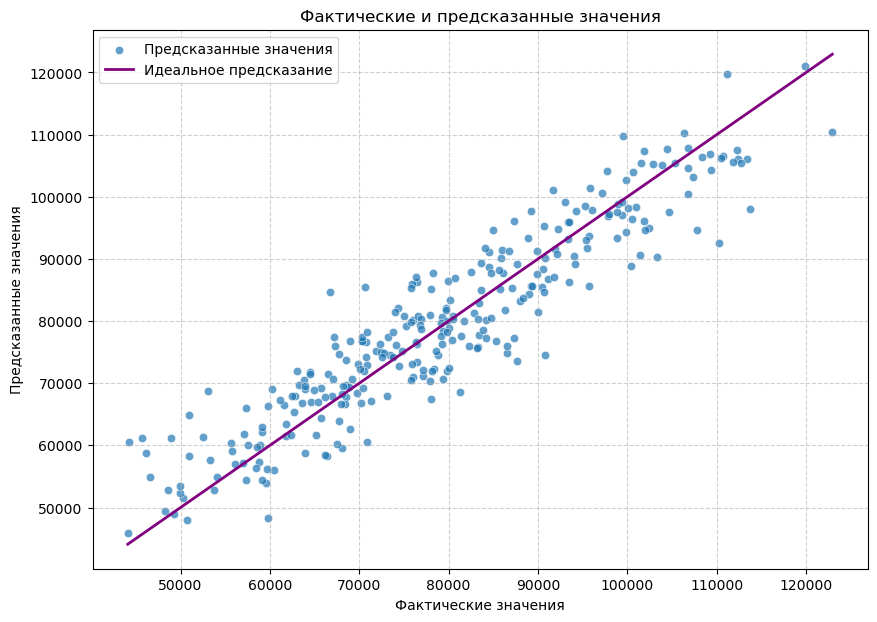

In [44]:
plt.figure(figsize=(10, 7)) 

# Точки, представляющие фактические и предсказанные значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Предсказанные значения') 

# Линия идеального предсказания
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', lw=2, label='Идеальное предсказание')

plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические и предсказанные значения")

# Добавление легенды
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Выводы по графику:**

1. Большинство точек расположено близко к фиолетовой линии. Модель хорошо справляется с прогнозированием зарплаты. Расхождение между фактическими и предсказанными значениями небольшое.
2. Наблюдается линейная зависимость. Чем выше фактическая зарплата, тем выше и предсказанная. Точки образуют «полосу» вдоль линии - это признак того, что модель улавливает основную закономерность в данных.
3. Есть небольшие отклонения (разброс точек). Некоторые точки расположены выше или ниже фиолетовой линии - это естественно и означает, что модель не всегда прогнозирует абсолютно точно, но ошибки невелики.
4. Отсутствуют значимые выбросы. Нет точек, значительно удалённых от общей группы, значит модель стабильна и не делает аномальных прогнозов.

Построенный график сравнения фактических и предсказанных значений показывает, что модель регрессии демонстрирует высокое качество прогнозирования. Большинство точек расположено близко к линии идеального предсказания, что говорит о хорошей точности модели. Ошибки предсказаний небольшие и распределены равномерно - модель не систематически завышает или занижает значения. Таким образом, модель адекватно описывает зависимость между признаками и целевой переменной (```salary```) и может использоваться для прогнозирования зарплаты на новых данных.

**3.12 Регрессия методом k-ближайших соседей.**

In [45]:
model_knn = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель
model_knn.fit(X_train_processed, y_train)

# Предсказания 
y_pred_knn = model_knn.predict(X_test_processed)

# Метрики качества 
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"Регрессия k-ближайших соседей")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")
print(f"R2:   {r2:.5f}")


Регрессия k-ближайших соседей
MSE:  121737061.59651
RMSE: 11033.45193
MAE:  9026.55475
R2:   0.55946


**Выводы:**

Модель регрессии методом k-ближайших соседей (KNN, k = 5) показала значительно худшие результаты по сравнению с линейной регрессией. Ошибки предсказаний (MAE и RMSE) почти в два раза выше, а коэффициент детерминации R2 составляет лишь 0.56, что означает низкую объясняющую способность модели. KNN плохо справляется с задачей прогнозирования зарплаты на данном наборе данных, вероятно, из-за высокой размерности признаков и нелокального характера зависимости.

**3.13 Визуализация и сравнение фактического и предсказанного значений, сравнение результатов полученых всеми методами.**

,Actual_salary,Predicted_salary,Predicted_k_method
0,90772.28,90117.11,93088.662566
1,84475.35,88639.51,77864.949040
2,67777.68,63882.12,66207.287607
3,110650.66,106502.06,86750.211491
4,68551.17,67807.23,69626.394846
5,79324.47,70714.84,73939.039645
6,59571.09,53864.15,70246.737211
7,90409.79,85511.18,85951.681297
8,92280.58,94850.45,104989.162110
9,79311.10,80720.94,81072.065074


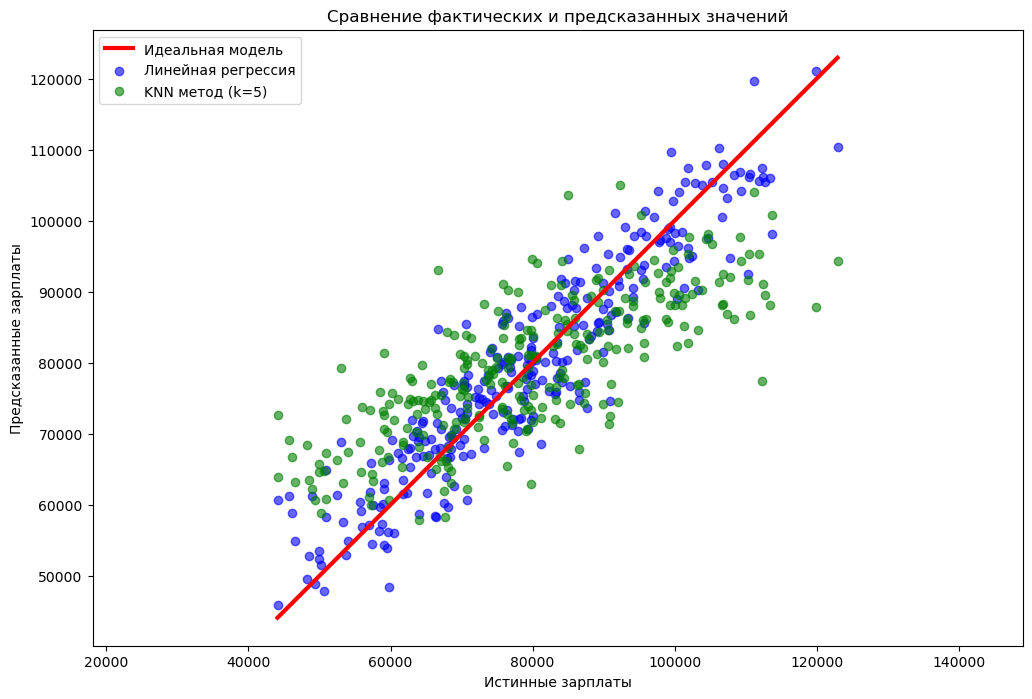

In [46]:
# Добавление предсказания KNN в DataFrame
df_results['Predicted_k_method'] = y_pred_knn

display(df_results.head(10))

plt.figure(figsize=(12, 8))

# Нахождение общих min/max для осей
min_val = min(y_test.min(), y_pred.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred.max(), y_pred_knn.max())

# Идеальная линия предсказания
plt.plot(
    [min_val, max_val], [min_val, max_val],
    linewidth=3,
    label='Идеальная модель',
    color='red'
)

# Линейная регрессия
plt.scatter(
    y_test, y_pred,
    alpha=0.6,
    label='Линейная регрессия',
    color='blue'
)

# Метод k-ближайших соседей
plt.scatter(
    y_test, y_pred_knn,
    alpha=0.6,
    label='KNN метод (k=5)',
    color='green'
)

plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Истинные зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.legend()
plt.axis('equal')
plt.show()


**Выводы:**

```Predicted``` - линейная регрессия\
```Predicted_k_method``` - KNN (k=5)

Поведение линейной регрессии:
1. Линейная модель предсказывает зарплату стабильно.
2. Ошибка по модулю в большинстве случаев меньше, чем у KNN.
3. Она хорошо работает с высокими значениями (пример 4 и 9).

Поведение KNN:
1. KNN «усредняет» предсказание на основе ближайших точек.
2. Поэтому модель плохо работает с крайними значениями (4 - сильное недопредсказание).
3. В случаях, когда фактическое значение ближе к средней величине - KNN показывает себя неплохо (3, 5, 6).

**Анализ графика:**

Линейная регрессия (синие точки):
1. Точки расположены ближе к красной линии.
2. Ошибки распределяются равномерно по всей шкале зарплат.
3. Модель хорошо улавливает общую тенденцию роста зарплаты в зависимости от признаков.
4. Линейная регрессия лучше моделирует зависимость между признаками и зарплатой.

KNN (зелёные точки):
1. Точки расположены более рассеяно.
2. KNN часто «сглаживает» значения и тяготеет к средней зарплате.
3. Заметно, что модель не справляется с предсказанием высоких и низких значений зарплат - точки находятся ниже красной линии.
4. KNN хуже предсказывает крайние значения, так как усредняет значения ближайших точек.

Обе модели показывают положительную зависимость: чем выше истинная зарплата, тем выше предсказание. Но точность у моделей разная: линейная регрессия визуально и статистически показывает результат лучше. KNN даёт конкурентный результат в отдельных случаях, но имеет общую тенденцию сглаживать значения, из-за чего при значительных отклонениях от среднего - ошибается сильнее.



**3.14 Выводы по третьей части.**

Анализ метрик и визуализация показывают, что лучше использовать линейную регрессию.
По метрикам видно, что линейная модель значительно точнее:
1. MSE у линейной регрессии составляет 36 935 814, тогда как у модели k-ближайших соседей - 121 737 061, что почти в 3 раза хуже.
2. MAE также ниже у линейной регрессии (4864 против 9026), то есть средняя ошибка в прогнозе зарплаты в два раза меньше.
3. Коэффициент детерминации R2 у линейной модели равен 0.8663, а у KNN - 0.5595, что говорит о том, что линейная регрессия объясняет изменения целевой переменной гораздо лучше.

График предсказаний подтверждает метрики: точки линейной регрессии (синие на графике) располагаются ближе к линии идеального предсказания, тогда как точки KNN (зелёные) заметно больше рассредоточены и часто отклоняются от прямой.

Можно предположить, что:
1. Зависимость между входными признаками и зарплатой носит линейный характер, и поэтому линейная модель улавливает её лучше;
2. Для метода k-ближайших соседей, вероятно, недостаточно данных - при большем объёме выборки модель могла бы определить «похожих соседей» точнее.

Таким образом, линейная регрессия — оптимальная модель для данной задачи: она точнее, стабильнее и лучше отражает структуру данных.

### **Вывод по лабораторной работе:**

В первой части лабораторной работы были исследованы признаки x1 и x2 и их влияние на переменную y. Была построена модель простой линейной регрессии, посчитаны ключевые метрики для сравнения двух моделей: MSE, MAE, RMSE, R2. Проведено сравнение двух моделей.

Во второй части была изучена полиномиальная регрессия, для нее была выбрана одна из двух переменных, а именно x2. В первый раз, степень полинома 2. Во второй раз, конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

В третьей части работы был проанализирован датасет, содержащий информацию о сотрудниках и их заработной плате. Набор данных включал как числовые признаки (возраст, опыт работы, доход, результаты тестов и др.), так и категориальные (город, уровень образования, тип занятости, наличие автомобиля и др.). Целью исследования было определить влияние различных факторов на уровень заработной платы и построить модель, способную предсказывать зарплату сотрудника.

На этапе предобработки были выполнены следующие действия:
1. удаление пропусков и выбросов;
2. разделение данных на обучающую и тестовую выборки (80/20);
3. нормализация числовых признаков с помощью ```StandardScaler```;
4. кодирование категориальных признаков методом ```One-Hot Encoding```.

Были проведены группировки и анализ через сводные таблицы, что позволило выявить закономерности: зарплата растёт с увеличением уровня образования (наибольшие доходы у сотрудников с ```PhD```), а также у работников ИТ-сферы и финансового сектора. В отдельных городах наблюдаются более высокие уровни зарплат, что подтверждает влияние местоположения компании.

Далее были построены две модели для предсказания зарплаты:
1. Линейная регрессия.
2. Регрессия методом k-ближайших соседей (kNN).

Для каждой модели были рассчитаны метрики качества (MSE, RMSE, MAE, R2). Линейная регрессия показала лучшие значения по всем метрикам:
1. R2 = 0.8663, что означает, что модель объясняет 87% вариации зарплат,
2. MSE и MAE значительно ниже, чем у kNN.

Анализ коэффициентов линейной регрессии позволил оценить важность признаков. Наиболее значимое влияние на зарплату оказали:
1. уровень образования (особенно наличие степени PhD),
2. опыт работы,
3. доход и тип работы (особенно ИТ и финансы).

Некоторые признаки показали отрицательное влияние (например, наличие долгов или работа в рознице). Это позволяет сделать вывод о логичности модели и соответствии выявленных связей реальным ожиданиям.

Итоговая визуализация, сравнивающая фактические и предсказанные значения, показала, что точки линейной регрессии располагаются ближе к линии идеального прогноза.

Проведённая работа доказала, что для данной задачи прогнозирования зарплаты эффективнее использовать линейную регрессию, так как зависимости между признаками и целевой переменной имеют преимущественно линейный характер. Предобработка данных и анализ показали важность учёта образования, профессиональной сферы и опыта работы при определении уровня дохода. Полученные результаты можно использовать для построения систем аналитики HR-данных, оценки кандидатов и планирования зарплатной политики компании.

### Дополнительное задание

**Задание №6:** Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# создание сетки параметров, которые будут тестироваться 
param_grid = {
    # n_neighbors - количество соседей: чем больше, тем сильнее сглаживание
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20],
    # "uniform" - все соседи равны, "distance" - ближние соседи важнее
    'weights': ['uniform', 'distance'],
    # metric - cпособы измерения расстояния (GridSearch переберёт все комбинации)
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# создание пустой KNN модели (параметры пока не заданы)
knn = KNeighborsRegressor()

# здесь задаются парамтеры:
grid_search = GridSearchCV(
    # на основе какой модели искать параметры
    estimator=knn,
    # что и как перебирать
    param_grid=param_grid,
    # оптимизация по MAE (чем меньше, тем лучше)
    scoring='neg_mean_absolute_error',
    # 5-fold cross-validation
    cv=5,
    # использовать все ядра процессора
    n_jobs=-1
)

# обучение GridSearchCV (разбивает данные, тестирует все параметры, выбирает лучший набор)
grid_search.fit(X_train_processed, y_train)

# лучшие найденные параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MAE:", -grid_search.best_score_)

# получилась готовая обученная модель с оптимальными параметрами
best_knn = grid_search.best_estimator_

# предсказания на тестовой выборке
y_pred_best_knn = best_knn.predict(X_test_processed)

# подсчёт метрик
mse = mean_squared_error(y_test, y_pred_best_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best_knn)
r2 = r2_score(y_test, y_pred_best_knn)

print("\nМетрики KNN после GridSearchCV:")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")
print(f"R2:   {r2:.5f}")

# сравнение с моделью k=5
print("\nСравнение с моделью k=5:")

print(f"KNN (k=5): R2 = 0.55946  (твое значение)")
print(f"KNN (best): R2 = {r2:.5f}")


Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Лучшее значение MAE: 7294.982307676075

Метрики KNN после GridSearchCV:
MSE:  114819981.46014
RMSE: 10715.40860
MAE:  8714.45001
R2:   0.58449

Сравнение с моделью k=5:
KNN (k=5): R2 = 0.55946  (твое значение)
KNN (best): R2 = 0.58449


**Вывод:**

Был проведён подбор оптимальных гиперпараметров модели k-ближайших соседей (KNN) с использованием метода перебора GridSearchCV. В процессе настройки рассматривались различные значения числа соседей, типы весов и виды метрик расстояния. Для оценки качества использовалась перекрёстная валидация с пятью фолдами и метрика средней абсолютной ошибки (MAE), поскольку она устойчива к выбросам и является подходящей для регрессионных задач данного типа. В результате перебора оптимальными оказались параметры: метрика расстояния - euclidean, число соседей - 15, режим весов - distance, при котором вклад ближних соседей больше, чем дальних.

После нахождения наилучших параметров модель с ними была обучена повторно и протестирована на отложенной выборке. Полученные метрики свидетельствуют о небольшом улучшении по сравнению с моделью KNN при базовых параметрах (k = 5). Значение коэффициента детерминации R^2 увеличилось с 0.559 до 0.584, а ошибки MAE и RMSE немного уменьшились. Однако, несмотря на повышение качества, итоговые показатели остаются относительно низкими: модель объясняет около 58% вариации целевой переменной, а средняя ошибка предсказания составляет примерно 8.7 тыс. долларов.

Сравнение с результатами линейной регрессии, которая демонстрировала значительно более высокое качество (R^2 около 0.86), показывает, что даже оптимизированный KNN остаётся менее эффективным методом для данного набора данных. Вероятно, это связано с высокой размерностью признаков, наличием категориальных переменных, а также с особенностями распределения целевой переменной. В таких условиях метод ближайших соседей сталкивается с потерей эффективности.

Таким образом, подбор гиперпараметров позволил добиться улучшения внутри самого алгоритма KNN, но не сделал его конкурентоспособным по сравнению с линейной регрессией. Это подтверждает, что для рассматриваемых данных линейные модели оказываются более подходящими и обеспечивают лучшее обобщение. Если целью является минимизация ошибки прогноза, KNN даже после оптимизации не является предпочтительным методом.